In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

Mounted at /content/drive
/content/drive/MyDrive/TA


In [ ]:
# Import data yang sudah dikasih label
df_1 = pd.read_csv("/content/drive/MyDrive/TA/1-141 SEMUA DATA LABEL.csv")

# Menghapus kolom "Time" dan "frekuensi"
df_1 = df_1.drop(columns=['ECG', 'VNS', '--0', '--1',
       '--2', '--3', '--4', 'LOC-ROC', 'PZ-OZ', '--5', 'FC1-Ref', 'FC2-Ref',
       'FC5-Ref', 'FC6-Ref', 'CP1-Ref', 'CP2-Ref', 'CP5-Ref', 'CP6-Ref', '.-0',
       '.-1', '.-2', '.-3', '.-4'])

# Menampilkan DataFrame setelah penghapusan
print(df_1)

               FP1-F7     F7-T7         T7-P7     P7-O1    FP1-F3     F3-C3  \
0       -1.953602e-07 -0.000003  8.009768e-06  0.000024  0.000029 -0.000021   
1       -8.791209e-06 -0.000010  4.493284e-06  0.000022  0.000018 -0.000033   
2       -1.269841e-05 -0.000016  1.953602e-07  0.000016  0.000006 -0.000038   
3       -1.543346e-05 -0.000025 -6.446886e-06  0.000017 -0.000009 -0.000037   
4       -2.285714e-05 -0.000028 -9.572650e-06  0.000020 -0.000032 -0.000030   
...               ...       ...           ...       ...       ...       ...   
8235259  8.420024e-05 -0.000119  4.493284e-06 -0.000070  0.000072  0.000044   
8235260  6.778999e-05 -0.000080 -2.598291e-05 -0.000087  0.000029 -0.000211   
8235261  7.755800e-05 -0.000063 -6.974359e-05 -0.000053  0.000027 -0.000192   
8235262  1.127228e-04 -0.000109 -6.153846e-05 -0.000029  0.000049 -0.000004   
8235263  1.107692e-04 -0.000131 -4.747253e-05 -0.000003  0.000013 -0.000026   

            C3-P3         P3-O1    FP2-F4     F4-C4

In [ ]:
# Simpan data setelah filtering ke file CSV
df_1.to_csv("/content/drive/MyDrive/TA/1-141 SEMUA DATA LABEL YG SUDAH DIHAPUS KOLOM NA NYA.csv", index=False)

print(f"Data setelah filtering berhasil disimpan dalam file CSV: {df_1}")


Data setelah filtering berhasil disimpan dalam file CSV:                FP1-F7     F7-T7         T7-P7     P7-O1    FP1-F3     F3-C3  \
0       -1.953602e-07 -0.000003  8.009768e-06  0.000024  0.000029 -0.000021   
1       -8.791209e-06 -0.000010  4.493284e-06  0.000022  0.000018 -0.000033   
2       -1.269841e-05 -0.000016  1.953602e-07  0.000016  0.000006 -0.000038   
3       -1.543346e-05 -0.000025 -6.446886e-06  0.000017 -0.000009 -0.000037   
4       -2.285714e-05 -0.000028 -9.572650e-06  0.000020 -0.000032 -0.000030   
...               ...       ...           ...       ...       ...       ...   
8235259  8.420024e-05 -0.000119  4.493284e-06 -0.000070  0.000072  0.000044   
8235260  6.778999e-05 -0.000080 -2.598291e-05 -0.000087  0.000029 -0.000211   
8235261  7.755800e-05 -0.000063 -6.974359e-05 -0.000053  0.000027 -0.000192   
8235262  1.127228e-04 -0.000109 -6.153846e-05 -0.000029  0.000049 -0.000004   
8235263  1.107692e-04 -0.000131 -4.747253e-05 -0.000003  0.000013 -0.00002

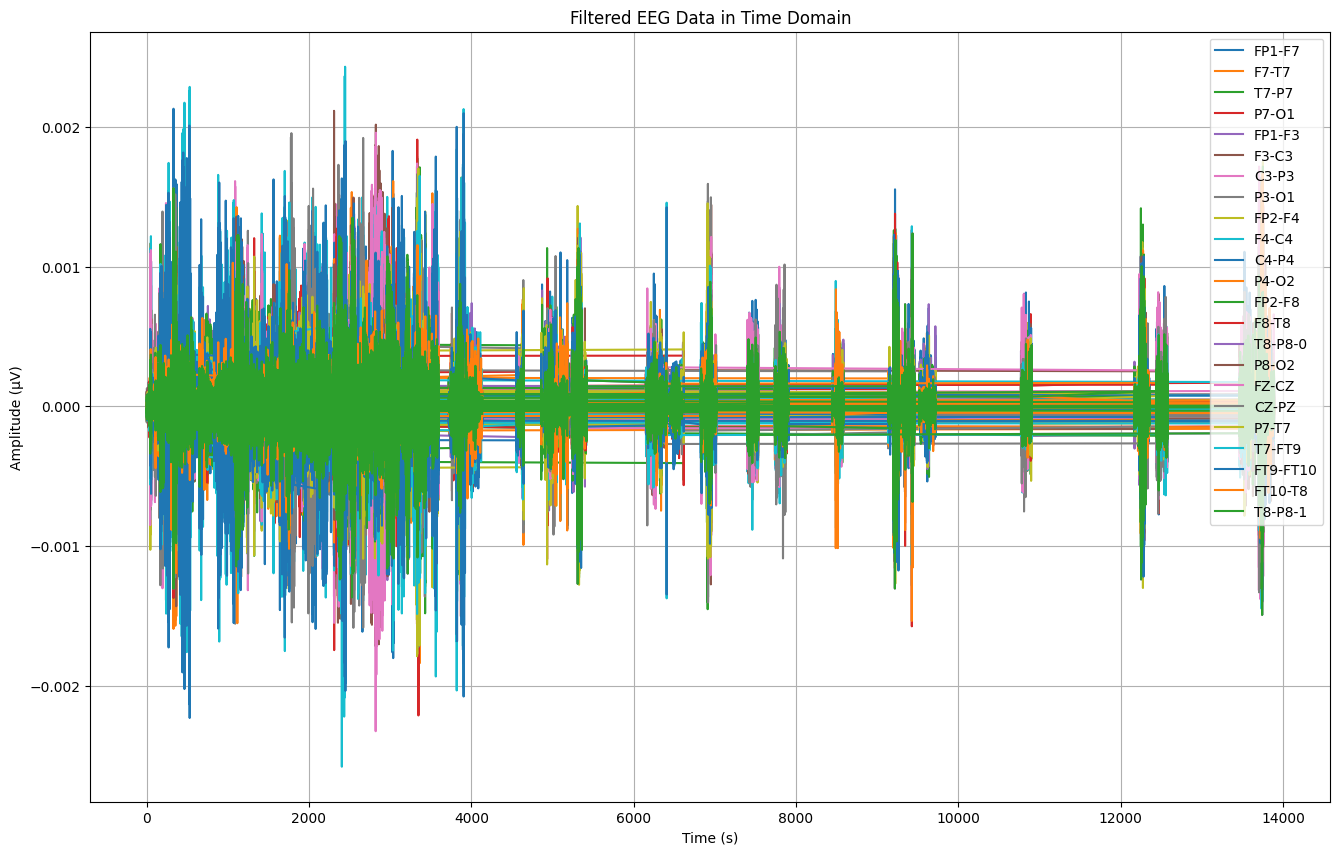

Data setelah filtering berhasil disimpan dalam file CSV:                FP1-F7         F7-T7         T7-P7         P7-O1        FP1-F3  \
0       -8.679836e-12 -1.475572e-10  3.558733e-10  1.084979e-09  1.310655e-09   
1       -4.072556e-10 -7.085832e-10  8.828198e-10  3.081058e-09  3.323340e-09   
2       -1.334939e-09 -1.892453e-09  1.249406e-09  5.250931e-09  4.976759e-09   
3       -2.729063e-09 -3.835323e-09  9.954724e-10  6.916850e-09  4.941836e-09   
4       -4.564173e-09 -6.219049e-09 -1.780820e-11  7.742373e-09  2.040566e-09   
...               ...           ...           ...           ...           ...   
8235259 -1.568961e-05 -4.136456e-06  2.575482e-05  6.292000e-05  3.486749e-05   
8235260 -2.761380e-05  6.097058e-06  1.796700e-05  6.472248e-05  2.027423e-05   
8235261 -2.687992e-05  4.278085e-06  9.706077e-06  7.236576e-05  8.300960e-06   
8235262 -1.441299e-05 -8.669904e-06  3.617880e-06  8.710240e-05  2.755202e-06   
8235263  4.841092e-06 -2.772242e-05  3.939158e-06  1

In [ ]:
# Import data yang sudah dikasih label
df_1 = pd.read_csv("/content/drive/MyDrive/TA/1-141 SEMUA DATA LABEL YG SUDAH DIHAPUS KOLOM NA NYA.csv")

# Step 9: Terapkan bandpass filter -> Simpan data hasil filter ke CSV
def bandpass_filter_fir(data, lowcut, highcut, sampling_rate, num_taps):
    nyquist = 0.5 * sampling_rate
    taps = firwin(num_taps, [lowcut / nyquist, highcut / nyquist], pass_zero='bandpass', window='hamming')
    filtered_data = lfilter(taps, 1.0, data, axis=0)
    return filtered_data

lowcut_freq = 1
highcut_freq = 30
sampling_rate = 256
num_taps = 846

# Misalnya, df_1 adalah DataFrame yang sudah ada sebelumnya
eeg_columns = df_1.columns[:-2]  # Semua kolom kecuali 'Time' dan 'seizure'
eeg_data = df_1[eeg_columns].values  # Data EEG

# Terapkan filter bandpass FIR pada data EEG
filtered_data = bandpass_filter_fir(eeg_data, lowcut_freq, highcut_freq, sampling_rate, num_taps)

TA1 = pd.DataFrame(filtered_data, columns=eeg_columns)
TA1['Time'] = df_1['Time'].values
TA1['seizure'] = df_1['seizure']

# Visualisasi data setelah filtering
plt.figure(figsize=(16, 10))

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Looping untuk menampilkan data dari kanal yang dipilih
for channel in channels:
    if channel in TA1.columns:
        plt.plot(TA1['Time'], TA1[channel], label=channel)

# Menambahkan judul dan label
plt.title('Filtered EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data setelah filtering ke file CSV
TA1.to_csv("/content/drive/MyDrive/TA/1-141 HASIL FILTERING DI COLAB.csv", index=False)

print(f"Data setelah filtering berhasil disimpan dalam file CSV: {TA1}")



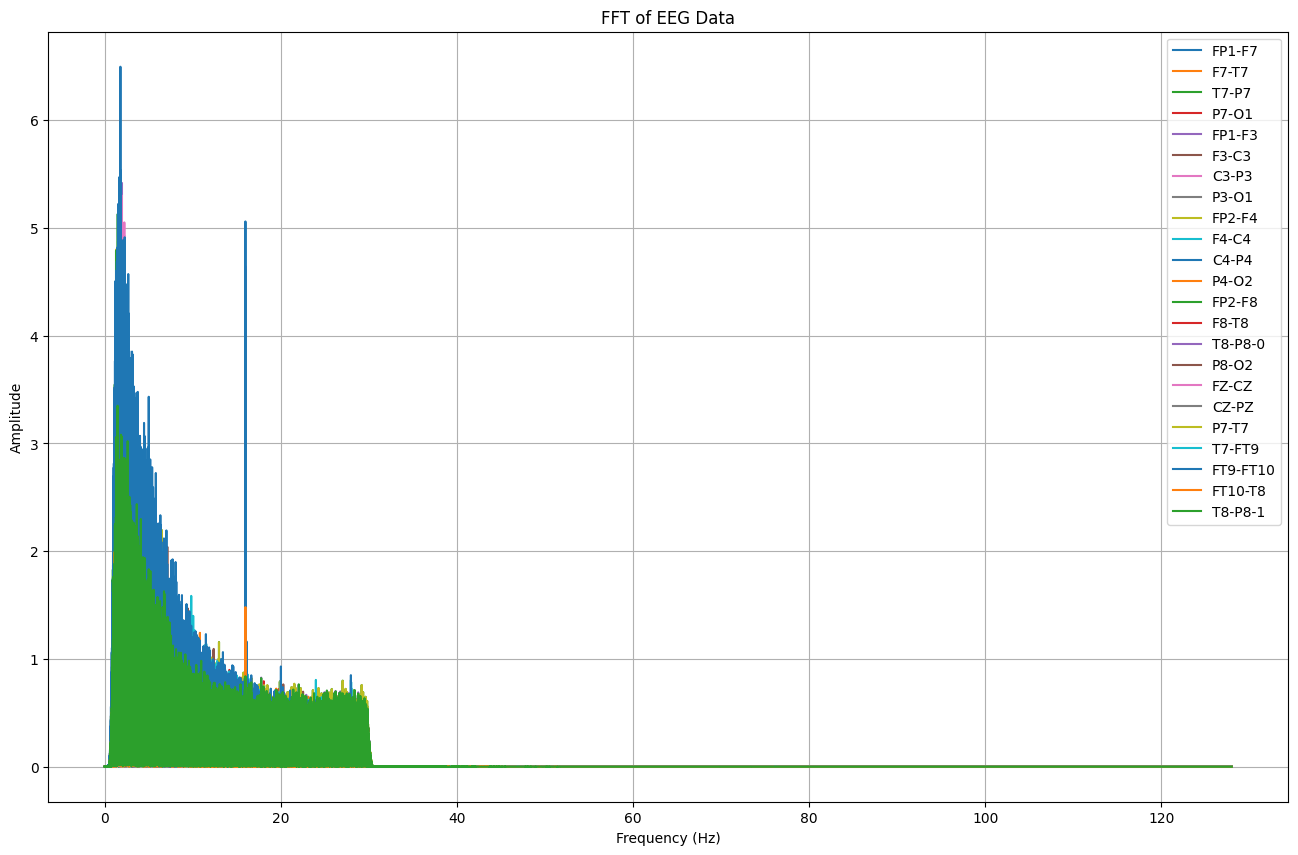

Data setelah FFT berhasil disimpan dalam file CSV:            FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
0        0.003381  0.002566  0.002577  0.002285  0.003590  0.003633  0.000935   
1        0.001082  0.000607  0.000532  0.000433  0.001335  0.001618  0.001037   
2        0.001180  0.000657  0.000694  0.000364  0.001372  0.001610  0.001016   
3        0.001572  0.001092  0.000990  0.000640  0.001882  0.002060  0.000694   
4        0.001087  0.000549  0.000703  0.000295  0.001467  0.001571  0.001016   
...           ...       ...       ...       ...       ...       ...       ...   
4117627  0.000008  0.000019  0.000003  0.000056  0.000005  0.000376  0.000375   
4117628  0.000008  0.000019  0.000003  0.000056  0.000005  0.000376  0.000375   
4117629  0.000008  0.000019  0.000003  0.000056  0.000005  0.000376  0.000375   
4117630  0.000008  0.000019  0.000003  0.000056  0.000005  0.000376  0.000375   
4117631  0.000008  0.000019  0.000003  0.000056  0.000005 

In [ ]:
# Step 10: Hitung FFT data EEG -> Simpan hasil ke CSV
# FFT dan ekstraksi fitur
def compute_fft(signal, sampling_rate):
    N = len(signal)
    T = 1.0 / sampling_rate
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, T)
    fft_vals = np.abs(fft_vals[:N // 2])
    fft_freqs = fft_freqs[:N // 2]
    return fft_freqs, fft_vals

# Ekstraksi fitur FFT
fft_features = []
for channel in channels:
    if channel in TA1.columns:
        signal = TA1[channel].values
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)
        fft_features.append(fft_vals)

# Mengubah fitur FFT menjadi DataFrame
TA_1 = pd.DataFrame(fft_features).T
TA_1.columns = channels
TA_1['seizure'] = TA1['seizure']
TA_1['frekuensi'] = fft_freqs  # Masukkan frekuensi sebagai kolom pertama


# Visualisasi data setelah FFT
plt.figure(figsize=(16, 10))

# Looping untuk menampilkan spektrum frekuensi dari kanal yang dipilih
for channel in channels:
    if channel in TA_1.columns:  # Memastikan kanal ada dalam data
        fft_freqs, fft_vals = compute_fft(TA1[channel].values, sampling_rate)
        plt.plot(fft_freqs, fft_vals, label=channel)

# Menambahkan judul dan label
plt.title('FFT of EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data setelah FFT ke file CSV
TA_1.to_csv("/content/drive/MyDrive/TA/1-141 HASIL FFT DI COLAB.csv", index=False)

print(f"Data setelah FFT berhasil disimpan dalam file CSV: {TA_1}")


In [ ]:
# Import data yang sudah dikasih label
TA1 = pd.read_csv("/content/drive/MyDrive/TA/1-141 HASIL FFT DI COLAB.csv")

# Menghapus kolom "Time" dan "frekuensi"
TA_1 = TA1.drop(columns=['frekuensi'])

# Menampilkan DataFrame setelah penghapusan
print(TA_1)

# Simpan data setelah FFT ke file CSV
TA_1.to_csv("/content/drive/MyDrive/TA/1-141 HASIL FFT DI COLAB KHUSUS RANDOM FOREST.csv", index=False)

print(f"Data setelah FFT berhasil disimpan dalam file CSV: {TA_1}")


           FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
0        0.003381  0.002566  0.002577  0.002285  0.003590  0.003633  0.000935   
1        0.001082  0.000607  0.000532  0.000433  0.001335  0.001618  0.001037   
2        0.001180  0.000657  0.000694  0.000364  0.001372  0.001610  0.001016   
3        0.001572  0.001092  0.000990  0.000640  0.001882  0.002060  0.000694   
4        0.001087  0.000549  0.000703  0.000295  0.001467  0.001571  0.001016   
...           ...       ...       ...       ...       ...       ...       ...   
4117627  0.000008  0.000019  0.000003  0.000056  0.000005  0.000376  0.000375   
4117628  0.000008  0.000019  0.000003  0.000056  0.000005  0.000376  0.000375   
4117629  0.000008  0.000019  0.000003  0.000056  0.000005  0.000376  0.000375   
4117630  0.000008  0.000019  0.000003  0.000056  0.000005  0.000376  0.000375   
4117631  0.000008  0.000019  0.000003  0.000056  0.000005  0.000376  0.000375   

            P3-O1    FP2-F4

Akurasi pada data latih: 0.7731896827818179
Akurasi pada data uji: 0.7723632619209814
Laporan Klasifikasi (Data Uji):
               precision    recall  f1-score   support

      kejang       0.92      0.40      0.56    296448
tidak kejang       0.74      0.98      0.85    527079

    accuracy                           0.77    823527
   macro avg       0.83      0.69      0.70    823527
weighted avg       0.81      0.77      0.74    823527



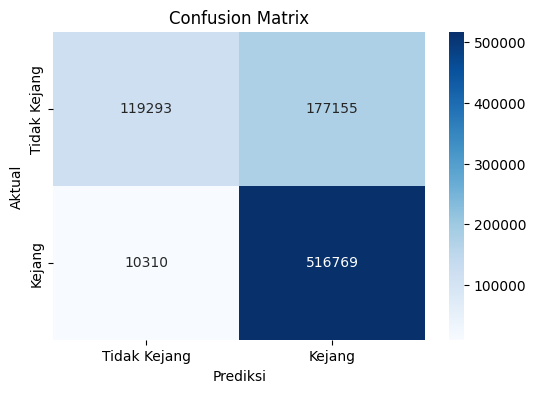

In [ ]:

# ini random forest
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data from the CSV file into a pandas DataFrame
TA_RDF = pd.read_csv("/content/drive/MyDrive/TA/1-141 HASIL FFT DI COLAB KHUSUS RANDOM FOREST.csv")

# Step 11: Siapkan data untuk klasifikasi
X = TA_RDF.drop(['seizure'], axis=1)
y = TA_RDF['seizure']

# Step 12: Bagi data menjadi latih dan uji secara stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Step 13: Latih model Random Forest dengan max_features='sqrt'
model = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt', random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data latih
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Prediksi pada data uji
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Step 14: Evaluasi model -> Cetak akurasi dan laporan
print("Akurasi pada data latih:", train_accuracy)  # Akurasi pada data latih
print("Akurasi pada data uji:", test_accuracy)  # Akurasi pada data uji
print("Laporan Klasifikasi (Data Uji):\n", classification_report(y_test, y_pred))

# Step 15: Matriks Evaluasi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Kejang', 'Kejang'], yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()


# PERCOBAAN DATA SAMPEL

In [ ]:
import pandas as pd

# Mengimpor data dari Google Drive (gunakan path sesuai dengan lokasi file di drive)
T_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb01_03.csv")
T_2 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb01_04.csv")
T_3 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb01_15.csv")
T_4 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb01_16.csv")
T_5 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb01_18.csv")
T_6 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb01_21.csv")
T_7 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb01_26.csv")
T_8 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb02_16.csv")
T_9 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb02_16+.csv")
T_10 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb02_19.csv")
T_11 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb03_01.csv")
T_12 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb03_02.csv")
T_13 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb03_03.csv")
T_14 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb03_04.csv")
T_15 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb03_34.csv")
T_16 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb03_35.csv")
T_17 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb03_36.csv")
T_18 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb04_05.csv")
T_19 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb04_08.csv")
T_20 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb04_28.csv")

# Menggabungkan semua dataframe dari TA_1 hingga TA_20 menjadi TA_data
T_data = pd.concat([T_1, T_2, T_3, T_4, T_5, T_6, T_7, T_8, T_9, T_10,
                     T_11, T_12, T_13, T_14, T_15, T_16, T_17, T_18, T_19, T_20], ignore_index=True)

# Menampilkan 5 baris pertama dari TA_data
print(T_data)

# Simpan data yang digabung
T_data.to_csv("/content/drive/MyDrive/TA/1-20 BARU LABEL.csv", index=False)

              FP1-F7     F7-T7         T7-P7         P7-O1    FP1-F3  \
0      -1.953602e-07 -0.000003  8.009768e-06  2.442002e-05  0.000029   
1      -8.791209e-06 -0.000010  4.493284e-06  2.246642e-05  0.000018   
2      -1.269841e-05 -0.000016  1.953602e-07  1.621490e-05  0.000006   
3      -1.543346e-05 -0.000025 -6.446886e-06  1.660562e-05 -0.000009   
4      -2.285714e-05 -0.000028 -9.572650e-06  1.973138e-05 -0.000032   
...              ...       ...           ...           ...       ...   
957947 -1.953602e-07 -0.000015  3.692308e-05  5.860806e-07  0.000030   
957948 -2.539683e-06 -0.000014  3.692308e-05 -1.308913e-05  0.000021   
957949 -9.181929e-06 -0.000021  1.855922e-05  9.768010e-07  0.000005   
957950 -1.308913e-05 -0.000022  1.308913e-05  1.934066e-05  0.000012   
957951  4.884005e-06 -0.000017  1.953602e-07  3.321123e-06  0.000021   

               F3-C3     C3-P3     P3-O1    FP2-F4         F4-C4  ...  \
0      -2.051282e-05 -0.000008  0.000029  0.000053 -4.981685e-

Jumlah data seizure dan tidak seizure:
seizure
tidak kejang    629760
kejang          328192
Name: count, dtype: int64


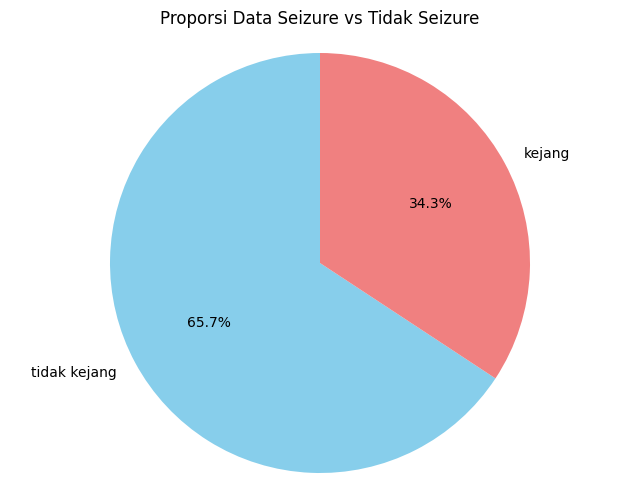

In [ ]:
# Import data yang sudah dikasih label
df_1 = pd.read_csv("/content/drive/MyDrive/TA/1-20 BARU LABEL.csv")


# Menghitung jumlah masing-masing label (seizure dan tidak seizure)
seizure_counts = df_1['seizure'].value_counts()

# Menampilkan jumlah data seizure dan tidak seizure
print("Jumlah data seizure dan tidak seizure:")
print(seizure_counts)

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(seizure_counts, labels=seizure_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proporsi Data Seizure vs Tidak Seizure')
plt.axis('equal')  # Menjaga proporsi lingkaran tetap
plt.show()

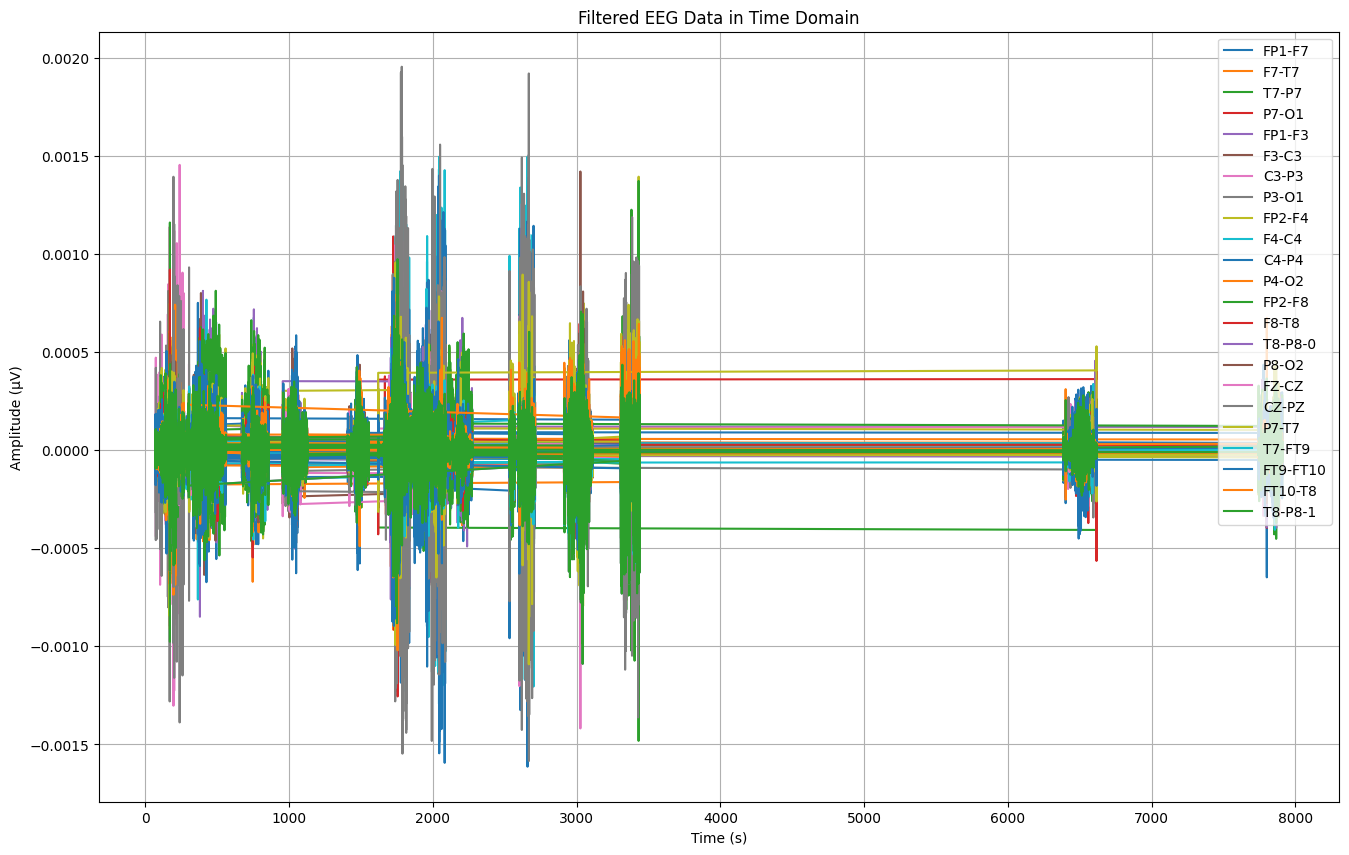

Data setelah filtering berhasil disimpan dalam file CSV:               FP1-F7         F7-T7         T7-P7         P7-O1        FP1-F3  \
0      -8.679836e-12 -1.475572e-10  3.558733e-10  1.084979e-09  1.310655e-09   
1      -4.072556e-10 -7.085832e-10  8.828198e-10  3.081058e-09  3.323340e-09   
2      -1.334939e-09 -1.892453e-09  1.249406e-09  5.250931e-09  4.976759e-09   
3      -2.729063e-09 -3.835323e-09  9.954724e-10  6.916850e-09  4.941836e-09   
4      -4.564173e-09 -6.219049e-09 -1.780820e-11  7.742373e-09  2.040566e-09   
...              ...           ...           ...           ...           ...   
957947 -1.608070e-05  1.981508e-05 -2.746323e-06  4.299988e-06 -2.176286e-05   
957948 -2.488938e-05  7.004518e-06 -1.261917e-07  1.221821e-05 -2.648920e-05   
957949 -2.763739e-05 -4.373234e-06  6.482395e-06  1.728209e-05 -2.574236e-05   
957950 -2.327449e-05 -1.117650e-05  1.426120e-05  1.779306e-05 -1.999876e-05   
957951 -1.415587e-05 -1.240539e-05  2.023788e-05  1.381503e-05 

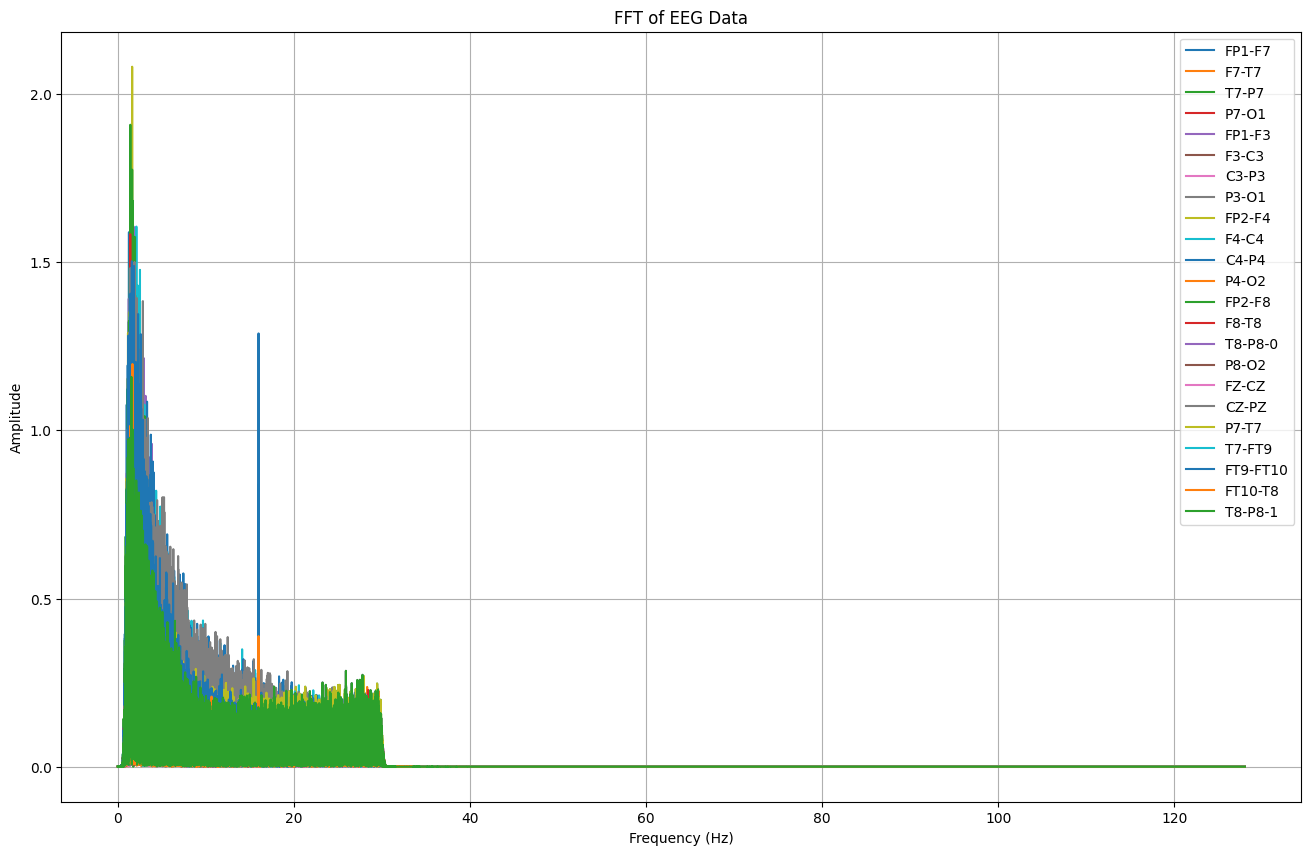

Data setelah FFT berhasil disimpan dalam file CSV:           FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3         F3-C3  \
0       0.000207  0.000159  0.000471  0.000579  0.000085  9.584321e-05   
1       0.000049  0.000339  0.000349  0.000345  0.000262  9.220661e-05   
2       0.000086  0.000231  0.000336  0.000340  0.000263  5.276758e-05   
3       0.000063  0.000243  0.000355  0.000315  0.000235  3.065507e-05   
4       0.000107  0.000228  0.000355  0.000332  0.000278  6.976022e-05   
...          ...       ...       ...       ...       ...           ...   
478971  0.000004  0.000006  0.000011  0.000005  0.000004  7.859747e-07   
478972  0.000004  0.000006  0.000011  0.000005  0.000004  7.849583e-07   
478973  0.000004  0.000006  0.000011  0.000005  0.000004  7.863098e-07   
478974  0.000004  0.000006  0.000011  0.000005  0.000004  7.857079e-07   
478975  0.000004  0.000006  0.000011  0.000005  0.000004  7.859739e-07   

           C3-P3     P3-O1    FP2-F4     F4-C4  ...     P8-O

In [ ]:
# Import data yang sudah dikasih label
df_1 = pd.read_csv("/content/drive/MyDrive/TA/1-20 BARU LABEL.csv")

# Step 9: Terapkan bandpass filter -> Simpan data hasil filter ke CSV
def bandpass_filter_fir(data, lowcut, highcut, sampling_rate, num_taps):
    nyquist = 0.5 * sampling_rate
    taps = firwin(num_taps, [lowcut / nyquist, highcut / nyquist], pass_zero='bandpass', window='hamming')
    filtered_data = lfilter(taps, 1.0, data, axis=0)
    return filtered_data

lowcut_freq = 1
highcut_freq = 30
sampling_rate = 256
num_taps = 846

# Misalnya, df_1 adalah DataFrame yang sudah ada sebelumnya
eeg_columns = df_1.columns[:-2]  # Semua kolom kecuali 'Time' dan 'seizure'
eeg_data = df_1[eeg_columns].values  # Data EEG

# Terapkan filter bandpass FIR pada data EEG
filtered_data = bandpass_filter_fir(eeg_data, lowcut_freq, highcut_freq, sampling_rate, num_taps)

TA1 = pd.DataFrame(filtered_data, columns=eeg_columns)
TA1['Time'] = df_1['Time'].values
TA1['seizure'] = df_1['seizure']

# Visualisasi data setelah filtering
plt.figure(figsize=(16, 10))

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Looping untuk menampilkan data dari kanal yang dipilih
for channel in channels:
    if channel in TA1.columns:
        plt.plot(TA1['Time'], TA1[channel], label=channel)

# Menambahkan judul dan label
plt.title('Filtered EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data setelah filtering ke file CSV
TA1.to_csv("/content/drive/MyDrive/TA/FILTERING/1-20 BARU LABEL", index=False)

print(f"Data setelah filtering berhasil disimpan dalam file CSV: {TA1}")

# Step 10: Hitung FFT data EEG -> Simpan hasil ke CSV
# FFT dan ekstraksi fitur
def compute_fft(signal, sampling_rate):
    N = len(signal)
    T = 1.0 / sampling_rate
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, T)
    fft_vals = np.abs(fft_vals[:N // 2])
    fft_freqs = fft_freqs[:N // 2]
    return fft_freqs, fft_vals

# Ekstraksi fitur FFT
fft_features = []
for channel in channels:
    if channel in TA1.columns:
        signal = TA1[channel].values
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)
        fft_features.append(fft_vals)

# Mengubah fitur FFT menjadi DataFrame
TA_1 = pd.DataFrame(fft_features).T
TA_1.columns = channels
TA_1['seizure'] = TA1['seizure']
TA_1['frekuensi'] = fft_freqs  # Masukkan frekuensi sebagai kolom pertama


# Visualisasi data setelah FFT
plt.figure(figsize=(16, 10))

# Looping untuk menampilkan spektrum frekuensi dari kanal yang dipilih
for channel in channels:
    if channel in TA_1.columns:  # Memastikan kanal ada dalam data
        fft_freqs, fft_vals = compute_fft(TA1[channel].values, sampling_rate)
        plt.plot(fft_freqs, fft_vals, label=channel)

# Menambahkan judul dan label
plt.title('FFT of EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data setelah FFT ke file CSV
TA_1.to_csv("/content/drive/MyDrive/TA/FFT/1-20 BARU LABEL", index=False)

print(f"Data setelah FFT berhasil disimpan dalam file CSV: {TA_1}")

# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load the data from the CSV file into a pandas DataFrame
TA_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/1-20 BARU LABEL")

# Step 11: Siapkan data untuk klasifikasi
X = TA_1.drop(['frekuensi', 'seizure'], axis=1)
y = TA_1['seizure']

# Step 12: Bagi data menjadi latih dan uji secara stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Step 13: Latih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Step 14: Evaluasi model -> Cetak akurasi dan laporan
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi pada data latih: 0.8752231327313534
Akurasi pada data uji: 0.8654327946887135
Laporan Klasifikasi (Data Uji):
               precision    recall  f1-score   support

      kejang       0.89      0.68      0.77     31642
tidak kejang       0.86      0.96      0.91     64154

    accuracy                           0.87     95796
   macro avg       0.87      0.82      0.84     95796
weighted avg       0.87      0.87      0.86     95796



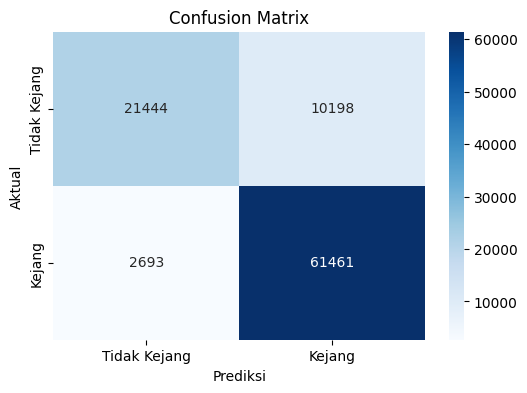

Cross-validation scores: [0.86327195 0.86609044 0.86508831 0.86728047 0.86550587 0.86358512
 0.86468881 0.86648433 0.86598326 0.86548218]
Mean CV Accuracy: 0.8653460742381283
Standard Deviation: 0.0011808065873106413


In [ ]:
# ini random forest
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data from the CSV file into a pandas DataFrame
TA_27 = pd.read_csv("/content/drive/MyDrive/TA/FFT/1-20 BARU LABEL")

# Step 11: Siapkan data untuk klasifikasi
X = TA_27.drop(['frekuensi', 'seizure'], axis=1)
y = TA_27['seizure']

# Step 12: Bagi data menjadi latih dan uji secara stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Step 13: Latih model Random Forest dengan max_features='sqrt'
model = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt', random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data latih
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Prediksi pada data uji
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Step 14: Evaluasi model -> Cetak akurasi dan laporan
print("Akurasi pada data latih:", train_accuracy)  # Akurasi pada data latih
print("Akurasi pada data uji:", test_accuracy)  # Akurasi pada data uji
print("Laporan Klasifikasi (Data Uji):\n", classification_report(y_test, y_pred))

# Step 15: Matriks Evaluasi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Kejang', 'Kejang'], yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# Step 16: K-Fold Cross Validation (Stratified K-Fold)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Cetak hasil cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))




In [ ]:
import pandas as pd

# Mengimpor data dari Google Drive (gunakan path sesuai dengan lokasi file di drive)
T_20_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb04_28_1.csv")
T_21 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb05_06.csv")
T_22 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb05_13.csv")
T_23 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb05_16.csv")
T_24 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb05_17.csv")
T_25 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb05_22.csv")
T_26 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb06_01.csv")
T_26_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb06_01_1.csv")
T_26_2 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb06_01_2.csv")
T_27 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb06_04.csv")
T_27_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb06_04_1.csv")
T_28 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb06_09.csv")
T_29 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb06_10.csv")
T_30 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb06_13.csv")
T_31 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb06_18.csv")
T_32 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb06_24.csv")
T_33 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb07_12.csv")
T_34 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb07_13.csv")
T_35 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb07_19.csv")
T_36 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb08_02.csv")
T_37 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb08_05.csv")
T_38 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb08_11.csv")
T_39 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb08_13.csv")
T_40 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb08_21.csv")



# Menggabungkan semua dataframe dari TA_1 hingga TA_20 menjadi TA_data
T_data = pd.concat([T_20_1,T_21,T_22,T_23,T_24,T_25,T_26,T_26_1, T_26_2,T_27,T_27_1, T_28,T_29,T_30,T_31,T_32,T_33,T_34,T_35,T_36,T_37,T_38,T_39,T_40,
], ignore_index=True)

# Menampilkan 5 baris pertama dari TA_data
print(T_data)

# Simpan data yang digabung
T_data.to_csv("/content/drive/MyDrive/TA/21-40 BARU LABEL.csv", index=False)

           FP1-F7     F7-T7     T7-P7         P7-O1    FP1-F3         F3-C3  \
0        0.000069 -0.000072  0.000036  1.953602e-07  0.000029  1.035409e-05   
1        0.000075 -0.000071  0.000037  1.953602e-07  0.000033  1.269841e-05   
2        0.000072 -0.000080  0.000040  1.953602e-07  0.000027  5.274725e-06   
3        0.000068 -0.000085  0.000037  1.953602e-07  0.000021  1.953602e-07   
4        0.000063 -0.000079  0.000035  5.860806e-07  0.000021 -1.367521e-06   
...           ...       ...       ...           ...       ...           ...   
1248251 -0.000223  0.000066  0.000041  2.402930e-05 -0.000143  1.113553e-05   
1248252 -0.000223  0.000054  0.000030  2.442002e-05 -0.000148  2.539683e-06   
1248253 -0.000218  0.000047  0.000034  1.347985e-05 -0.000150  4.493284e-06   
1248254 -0.000217  0.000045  0.000037  1.191697e-05 -0.000144  1.367521e-06   
1248255 -0.000211  0.000042  0.000036  1.699634e-05 -0.000140  4.493284e-06   

            C3-P3     P3-O1    FP2-F4     F4-C4  ..

Jumlah data seizure dan tidak seizure:
seizure
tidak kejang    737280
kejang          510976
Name: count, dtype: int64


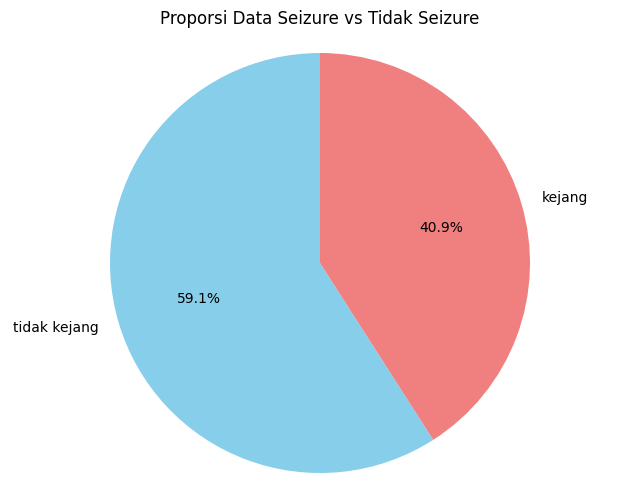

In [ ]:
# Import data yang sudah dikasih label
df_1 = pd.read_csv("/content/drive/MyDrive/TA/21-40 BARU LABEL.csv")


# Menghitung jumlah masing-masing label (seizure dan tidak seizure)
seizure_counts = df_1['seizure'].value_counts()

# Menampilkan jumlah data seizure dan tidak seizure
print("Jumlah data seizure dan tidak seizure:")
print(seizure_counts)

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(seizure_counts, labels=seizure_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proporsi Data Seizure vs Tidak Seizure')
plt.axis('equal')  # Menjaga proporsi lingkaran tetap
plt.show()

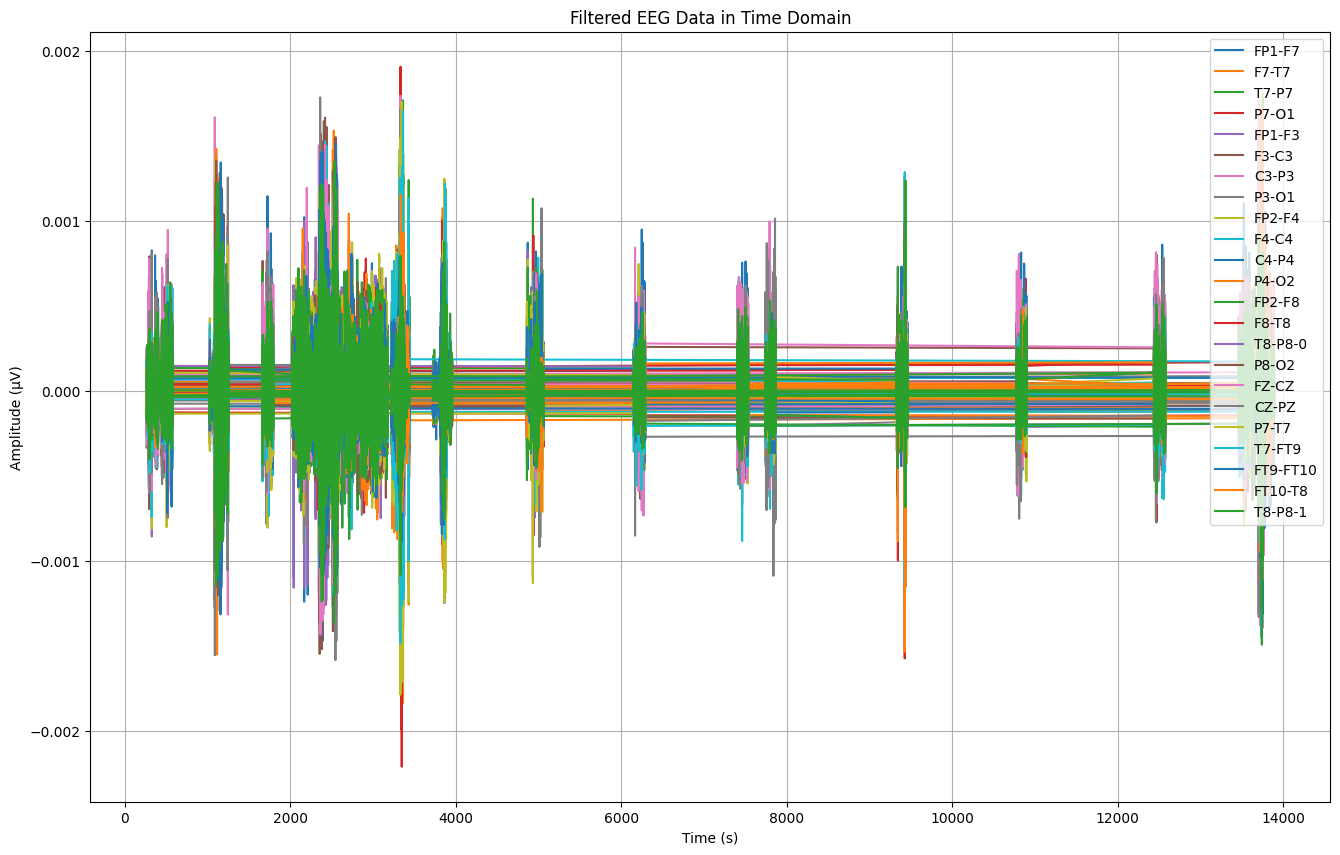

Data setelah filtering berhasil disimpan dalam file CSV:                FP1-F7         F7-T7         T7-P7         P7-O1        FP1-F3  \
0        3.081342e-09 -3.185500e-09  1.588410e-09  8.679836e-12  1.275936e-09   
1        9.257106e-09 -9.266106e-09  4.689820e-09  2.534285e-11  3.898995e-09   
2        1.704261e-08 -1.729155e-08  8.755949e-09  4.625691e-11  7.046228e-09   
3        2.400267e-08 -2.525312e-08  1.252683e-08  6.538424e-11  9.515941e-09   
4        2.796628e-08 -3.076325e-08  1.487240e-08  9.485466e-11  1.053410e-08   
...               ...           ...           ...           ...           ...   
1248251  1.519117e-05 -2.549876e-05 -1.512826e-04  9.137200e-05 -2.642098e-05   
1248252  1.661543e-05 -2.219646e-05 -1.536926e-04  1.058052e-04 -3.807772e-05   
1248253  2.451942e-05 -1.815925e-05 -1.475788e-04  1.100882e-04 -3.797556e-05   
1248254  3.796229e-05 -1.376260e-05 -1.330909e-04  1.052568e-04 -2.492470e-05   
1248255  5.477458e-05 -9.557961e-06 -1.134234e-04  9

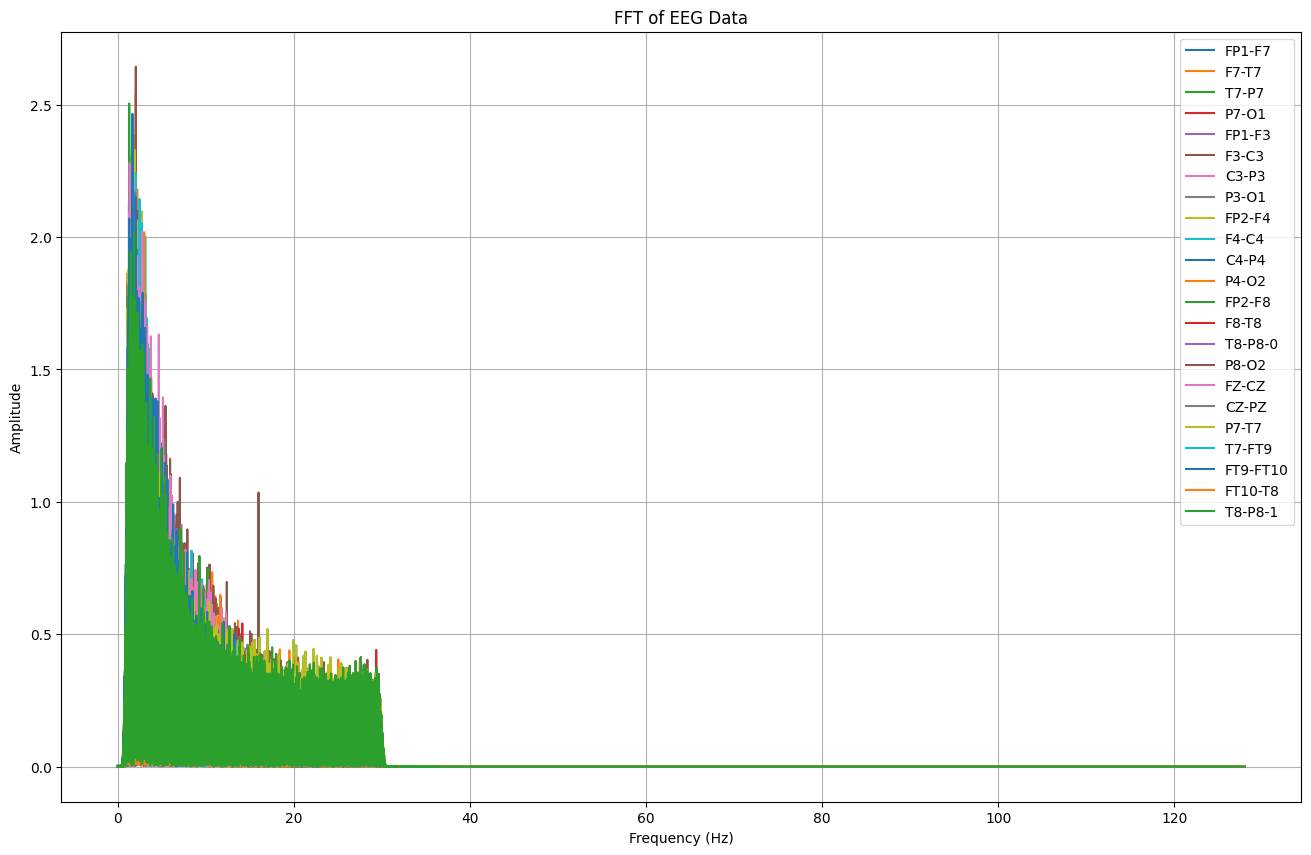

Data setelah FFT berhasil disimpan dalam file CSV:           FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3         F3-C3  \
0       0.000772  0.002155  0.002346  0.004238  0.001252  2.887554e-04   
1       0.000954  0.002336  0.002040  0.003961  0.001486  8.603870e-05   
2       0.000913  0.002425  0.002068  0.004005  0.001475  6.698046e-05   
3       0.000944  0.002407  0.002143  0.004025  0.001451  1.096198e-04   
4       0.000927  0.002390  0.002072  0.003997  0.001435  2.566377e-05   
...          ...       ...       ...       ...       ...           ...   
624123  0.000032  0.000004  0.000051  0.000045  0.000007  2.772808e-07   
624124  0.000032  0.000004  0.000051  0.000045  0.000007  2.761501e-07   
624125  0.000032  0.000004  0.000051  0.000045  0.000007  2.772235e-07   
624126  0.000032  0.000004  0.000051  0.000045  0.000007  2.770737e-07   
624127  0.000032  0.000004  0.000051  0.000045  0.000007  2.761256e-07   

           C3-P3     P3-O1    FP2-F4     F4-C4  ...     P8-O

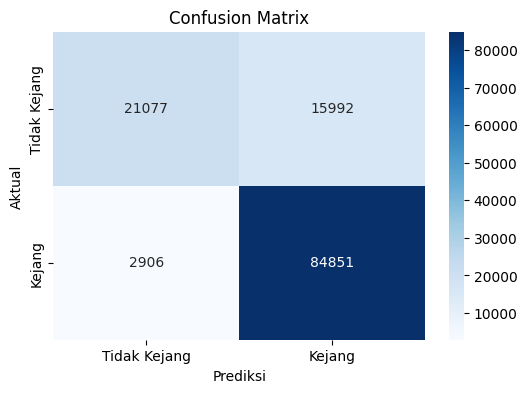

Cross-validation scores: [0.84775608 0.84685883 0.84770801 0.85088043 0.84818868 0.85036771
 0.84810857 0.84918206 0.84940396 0.84760943]
Mean CV Accuracy: 0.8486063752958435
Standard Deviation: 0.0012345580540331362


In [ ]:
# Import data yang sudah dikasih label
df_1 = pd.read_csv("/content/drive/MyDrive/TA/21-40 BARU LABEL.csv")

# Step 9: Terapkan bandpass filter -> Simpan data hasil filter ke CSV
def bandpass_filter_fir(data, lowcut, highcut, sampling_rate, num_taps):
    nyquist = 0.5 * sampling_rate
    taps = firwin(num_taps, [lowcut / nyquist, highcut / nyquist], pass_zero='bandpass', window='hamming')
    filtered_data = lfilter(taps, 1.0, data, axis=0)
    return filtered_data

lowcut_freq = 1
highcut_freq = 30
sampling_rate = 256
num_taps = 846

# Misalnya, df_1 adalah DataFrame yang sudah ada sebelumnya
eeg_columns = df_1.columns[:-2]  # Semua kolom kecuali 'Time' dan 'seizure'
eeg_data = df_1[eeg_columns].values  # Data EEG

# Terapkan filter bandpass FIR pada data EEG
filtered_data = bandpass_filter_fir(eeg_data, lowcut_freq, highcut_freq, sampling_rate, num_taps)

TA1 = pd.DataFrame(filtered_data, columns=eeg_columns)
TA1['Time'] = df_1['Time'].values
TA1['seizure'] = df_1['seizure']

# Visualisasi data setelah filtering
plt.figure(figsize=(16, 10))

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Looping untuk menampilkan data dari kanal yang dipilih
for channel in channels:
    if channel in TA1.columns:
        plt.plot(TA1['Time'], TA1[channel], label=channel)

# Menambahkan judul dan label
plt.title('Filtered EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data setelah filtering ke file CSV
TA1.to_csv("/content/drive/MyDrive/TA/FILTERING/21-40 BARU LABEL", index=False)

print(f"Data setelah filtering berhasil disimpan dalam file CSV: {TA1}")

# Step 10: Hitung FFT data EEG -> Simpan hasil ke CSV
# FFT dan ekstraksi fitur
def compute_fft(signal, sampling_rate):
    N = len(signal)
    T = 1.0 / sampling_rate
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, T)
    fft_vals = np.abs(fft_vals[:N // 2])
    fft_freqs = fft_freqs[:N // 2]
    return fft_freqs, fft_vals

# Ekstraksi fitur FFT
fft_features = []
for channel in channels:
    if channel in TA1.columns:
        signal = TA1[channel].values
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)
        fft_features.append(fft_vals)

# Mengubah fitur FFT menjadi DataFrame
TA_1 = pd.DataFrame(fft_features).T
TA_1.columns = channels
TA_1['seizure'] = TA1['seizure']
TA_1['frekuensi'] = fft_freqs  # Masukkan frekuensi sebagai kolom pertama


# Visualisasi data setelah FFT
plt.figure(figsize=(16, 10))

# Looping untuk menampilkan spektrum frekuensi dari kanal yang dipilih
for channel in channels:
    if channel in TA_1.columns:  # Memastikan kanal ada dalam data
        fft_freqs, fft_vals = compute_fft(TA1[channel].values, sampling_rate)
        plt.plot(fft_freqs, fft_vals, label=channel)

# Menambahkan judul dan label
plt.title('FFT of EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data setelah FFT ke file CSV
TA_1.to_csv("/content/drive/MyDrive/TA/FFT/21-40 BARU LABEL", index=False)

print(f"Data setelah FFT berhasil disimpan dalam file CSV: {TA_1}")

# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# ini random forest
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data from the CSV file into a pandas DataFrame
TA_27 = pd.read_csv("/content/drive/MyDrive/TA/FFT/21-40 BARU LABEL")

# Step 11: Siapkan data untuk klasifikasi
X = TA_27.drop(['frekuensi', 'seizure'], axis=1)
y = TA_27['seizure']

# Step 12: Bagi data menjadi latih dan uji secara stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Step 13: Latih model Random Forest dengan max_features='sqrt'
model = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt', random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data latih
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Prediksi pada data uji
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Step 14: Evaluasi model -> Cetak akurasi dan laporan
print("Akurasi pada data latih:", train_accuracy)  # Akurasi pada data latih
print("Akurasi pada data uji:", test_accuracy)  # Akurasi pada data uji
print("Laporan Klasifikasi (Data Uji):\n", classification_report(y_test, y_pred))

# Step 15: Matriks Evaluasi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Kejang', 'Kejang'], yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# Step 16: K-Fold Cross Validation (Stratified K-Fold)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Cetak hasil cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))





In [ ]:
import pandas as pd

# Mengimpor data dari Google Drive (gunakan path sesuai dengan lokasi file di drive)
T1 = pd.read_csv("/content/drive/MyDrive/TA/1-20 BARU LABEL.csv")
T2 = pd.read_csv("/content/drive/MyDrive/TA/21-40 BARU LABEL.csv")

# Menggabungkan semua dataframe dari TA_1 hingga TA_20 menjadi TA_data
T_data = pd.concat([T1,T2], ignore_index=True)

# Menampilkan 5 baris pertama dari TA_data
print(T_data)

# Simpan data yang digabung
T_data.to_csv("/content/drive/MyDrive/TA/1-20-21-40 BARU LABEL.csv", index=False)

               FP1-F7     F7-T7         T7-P7     P7-O1    FP1-F3     F3-C3  \
0       -1.953602e-07 -0.000003  8.009768e-06  0.000024  0.000029 -0.000021   
1       -8.791209e-06 -0.000010  4.493284e-06  0.000022  0.000018 -0.000033   
2       -1.269841e-05 -0.000016  1.953602e-07  0.000016  0.000006 -0.000038   
3       -1.543346e-05 -0.000025 -6.446886e-06  0.000017 -0.000009 -0.000037   
4       -2.285714e-05 -0.000028 -9.572650e-06  0.000020 -0.000032 -0.000030   
...               ...       ...           ...       ...       ...       ...   
2206203 -2.229060e-04  0.000066  4.083028e-05  0.000024 -0.000143  0.000011   
2206204 -2.225153e-04  0.000054  3.028083e-05  0.000024 -0.000148  0.000003   
2206205 -2.178266e-04  0.000047  3.418803e-05  0.000013 -0.000150  0.000004   
2206206 -2.174359e-04  0.000045  3.731380e-05  0.000012 -0.000144  0.000001   
2206207 -2.111844e-04  0.000042  3.614164e-05  0.000017 -0.000140  0.000004   

            C3-P3     P3-O1    FP2-F4     F4-C4  ..

In [ ]:
for i, df in enumerate([T1, T2], start=1):
    print(f"File T_{i} kolomnya: {df.columns.tolist()}")


File T_1 kolomnya: ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1', 'Time', 'seizure', 'ECG']
File T_2 kolomnya: ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1', 'ECG', 'Time', 'seizure']


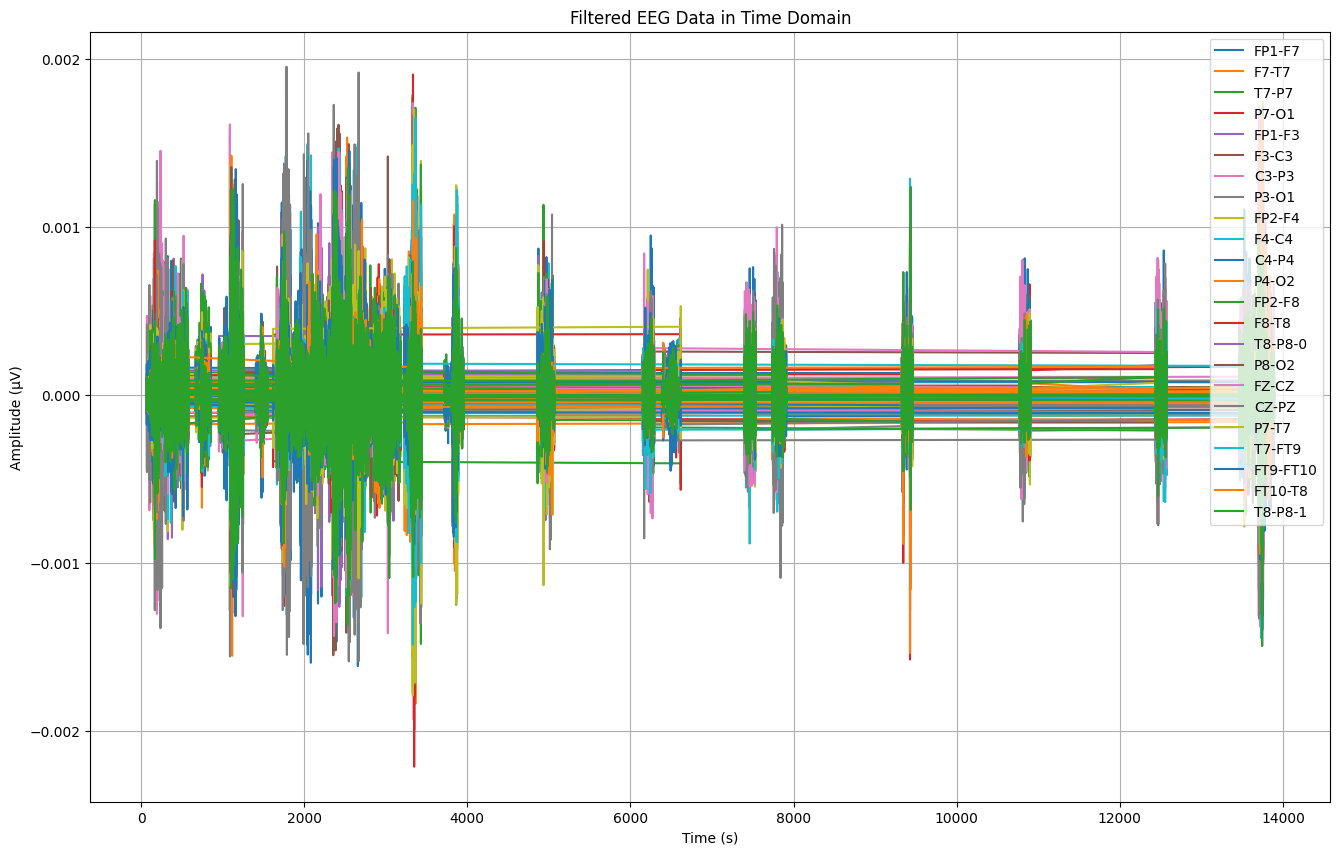

Data setelah filtering berhasil disimpan dalam file CSV:                FP1-F7         F7-T7         T7-P7         P7-O1        FP1-F3  \
0       -8.679836e-12 -1.475572e-10  3.558733e-10  1.084979e-09  1.310655e-09   
1       -4.072556e-10 -7.085832e-10  8.828198e-10  3.081058e-09  3.323340e-09   
2       -1.334939e-09 -1.892453e-09  1.249406e-09  5.250931e-09  4.976759e-09   
3       -2.729063e-09 -3.835323e-09  9.954724e-10  6.916850e-09  4.941836e-09   
4       -4.564173e-09 -6.219049e-09 -1.780820e-11  7.742373e-09  2.040566e-09   
...               ...           ...           ...           ...           ...   
2206203  1.519117e-05 -2.549876e-05 -1.512826e-04  9.137200e-05 -2.642098e-05   
2206204  1.661543e-05 -2.219646e-05 -1.536926e-04  1.058052e-04 -3.807772e-05   
2206205  2.451942e-05 -1.815925e-05 -1.475788e-04  1.100882e-04 -3.797556e-05   
2206206  3.796229e-05 -1.376260e-05 -1.330909e-04  1.052568e-04 -2.492470e-05   
2206207  5.477458e-05 -9.557961e-06 -1.134234e-04  9

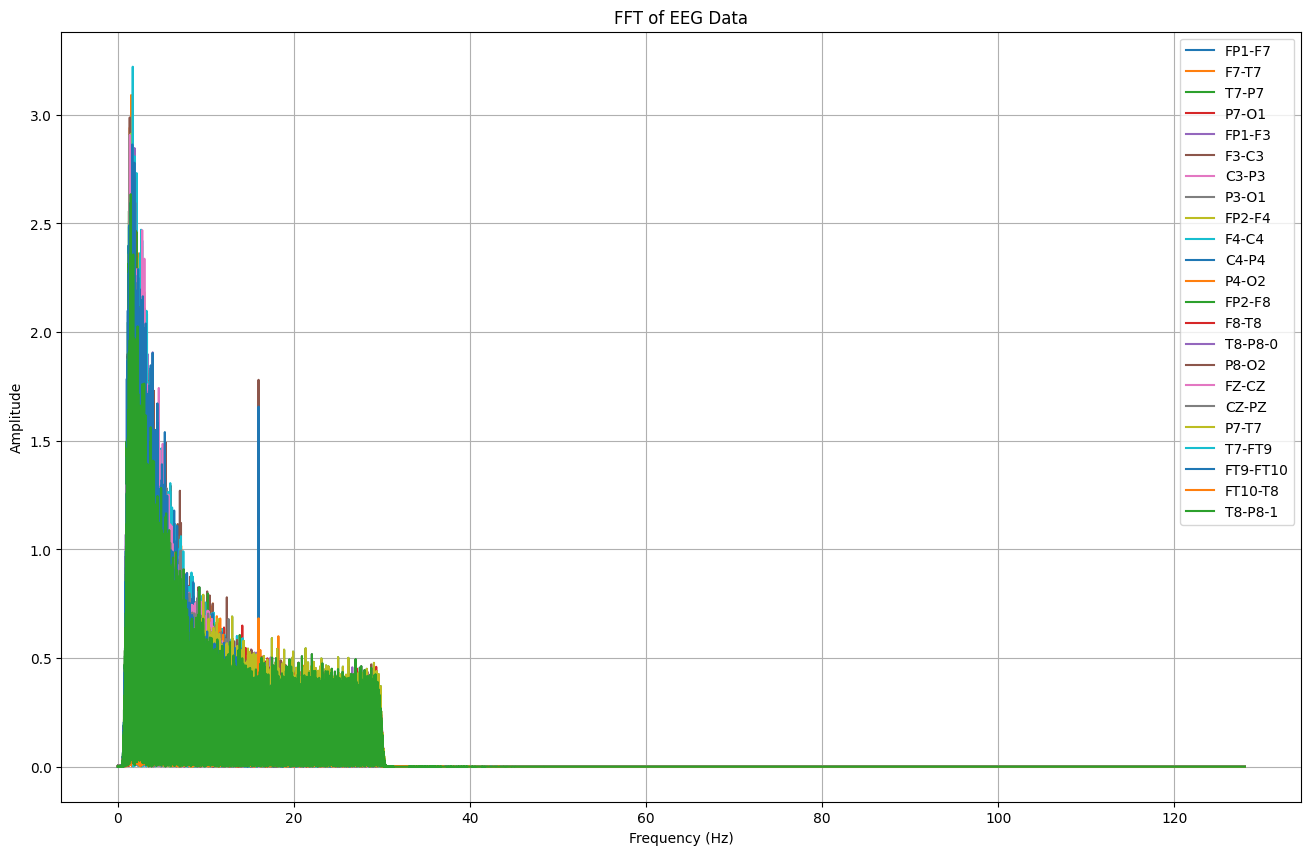

Data setelah FFT berhasil disimpan dalam file CSV:            FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3         F3-C3  \
0        0.000527  0.002051  0.002461  0.004497  0.001079  4.273368e-04   
1        0.000988  0.002387  0.002082  0.003991  0.001467  3.034953e-05   
2        0.000985  0.002371  0.002054  0.003930  0.001461  6.755840e-05   
3        0.000876  0.002454  0.001991  0.003976  0.001413  4.207707e-05   
4        0.001034  0.002300  0.002021  0.004027  0.001548  9.969331e-05   
...           ...       ...       ...       ...       ...           ...   
1103099  0.000032  0.000004  0.000051  0.000045  0.000007  2.756206e-07   
1103100  0.000032  0.000004  0.000051  0.000045  0.000007  2.762988e-07   
1103101  0.000032  0.000004  0.000051  0.000045  0.000007  2.752946e-07   
1103102  0.000032  0.000004  0.000051  0.000045  0.000007  2.752209e-07   
1103103  0.000032  0.000004  0.000051  0.000045  0.000007  2.760160e-07   

            C3-P3     P3-O1    FP2-F4     F4-C4 

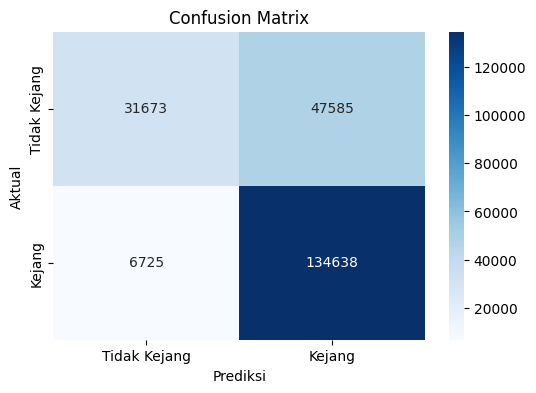

Cross-validation scores: [0.75344254 0.75022437 0.7526448  0.75231845 0.75422899 0.75353096
 0.75329526 0.75399329 0.75209863 0.75273321]
Mean CV Accuracy: 0.7528510482910472
Standard Deviation: 0.001096293531491063


In [ ]:
# Import data yang sudah dikasih label
df_1 = pd.read_csv("/content/drive/MyDrive/TA/1-20-21-40 BARU LABEL.csv")

# Step 9: Terapkan bandpass filter -> Simpan data hasil filter ke CSV
def bandpass_filter_fir(data, lowcut, highcut, sampling_rate, num_taps):
    nyquist = 0.5 * sampling_rate
    taps = firwin(num_taps, [lowcut / nyquist, highcut / nyquist], pass_zero='bandpass', window='hamming')
    filtered_data = lfilter(taps, 1.0, data, axis=0)
    return filtered_data

lowcut_freq = 1
highcut_freq = 30
sampling_rate = 256
num_taps = 846

# Misalnya, df_1 adalah DataFrame yang sudah ada sebelumnya
eeg_columns = df_1.columns[:-2]  # Semua kolom kecuali 'Time' dan 'seizure'
eeg_data = df_1[eeg_columns].values  # Data EEG

# Terapkan filter bandpass FIR pada data EEG
filtered_data = bandpass_filter_fir(eeg_data, lowcut_freq, highcut_freq, sampling_rate, num_taps)

TA1 = pd.DataFrame(filtered_data, columns=eeg_columns)
TA1['Time'] = df_1['Time'].values
TA1['seizure'] = df_1['seizure']

# Visualisasi data setelah filtering
plt.figure(figsize=(16, 10))

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Looping untuk menampilkan data dari kanal yang dipilih
for channel in channels:
    if channel in TA1.columns:
        plt.plot(TA1['Time'], TA1[channel], label=channel)

# Menambahkan judul dan label
plt.title('Filtered EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data setelah filtering ke file CSV
TA1.to_csv("/content/drive/MyDrive/TA/FILTERING/21-40 BARU LABEL", index=False)

print(f"Data setelah filtering berhasil disimpan dalam file CSV: {TA1}")

# Step 10: Hitung FFT data EEG -> Simpan hasil ke CSV
# FFT dan ekstraksi fitur
def compute_fft(signal, sampling_rate):
    N = len(signal)
    T = 1.0 / sampling_rate
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, T)
    fft_vals = np.abs(fft_vals[:N // 2])
    fft_freqs = fft_freqs[:N // 2]
    return fft_freqs, fft_vals

# Ekstraksi fitur FFT
fft_features = []
for channel in channels:
    if channel in TA1.columns:
        signal = TA1[channel].values
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)
        fft_features.append(fft_vals)

# Mengubah fitur FFT menjadi DataFrame
TA_1 = pd.DataFrame(fft_features).T
TA_1.columns = channels
TA_1['seizure'] = TA1['seizure']
TA_1['frekuensi'] = fft_freqs  # Masukkan frekuensi sebagai kolom pertama


# Visualisasi data setelah FFT
plt.figure(figsize=(16, 10))

# Looping untuk menampilkan spektrum frekuensi dari kanal yang dipilih
for channel in channels:
    if channel in TA_1.columns:  # Memastikan kanal ada dalam data
        fft_freqs, fft_vals = compute_fft(TA1[channel].values, sampling_rate)
        plt.plot(fft_freqs, fft_vals, label=channel)

# Menambahkan judul dan label
plt.title('FFT of EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data setelah FFT ke file CSV
TA_1.to_csv("/content/drive/MyDrive/TA/FFT/21-40 BARU LABEL", index=False)

print(f"Data setelah FFT berhasil disimpan dalam file CSV: {TA_1}")

# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# ini random forest
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data from the CSV file into a pandas DataFrame
TA_27 = pd.read_csv("/content/drive/MyDrive/TA/FFT/21-40 BARU LABEL")

# Step 11: Siapkan data untuk klasifikasi
X = TA_27.drop(['frekuensi', 'seizure'], axis=1)
y = TA_27['seizure']

# Step 12: Bagi data menjadi latih dan uji secara stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Step 13: Latih model Random Forest dengan max_features='sqrt'
model = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt', random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data latih
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Prediksi pada data uji
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Step 14: Evaluasi model -> Cetak akurasi dan laporan
print("Akurasi pada data latih:", train_accuracy)  # Akurasi pada data latih
print("Akurasi pada data uji:", test_accuracy)  # Akurasi pada data uji
print("Laporan Klasifikasi (Data Uji):\n", classification_report(y_test, y_pred))

# Step 15: Matriks Evaluasi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Kejang', 'Kejang'], yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# Step 16: K-Fold Cross Validation (Stratified K-Fold)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Cetak hasil cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))





Jumlah data seizure dan tidak seizure:
seizure
tidak kejang    1367040
kejang           839168
Name: count, dtype: int64


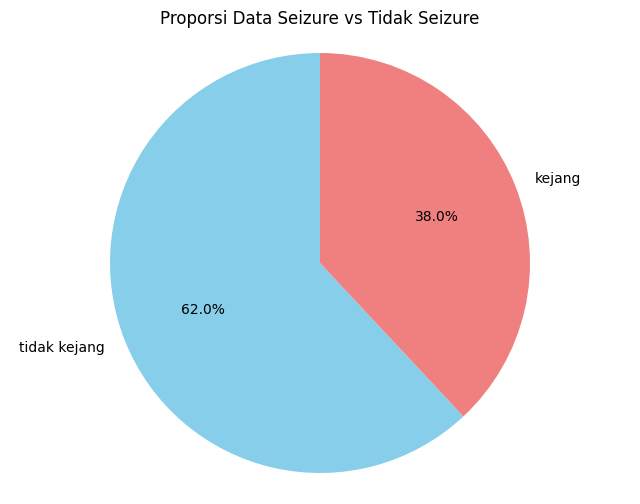

In [ ]:
# Import data yang sudah dikasih label
df_1 = pd.read_csv("/content/drive/MyDrive/TA/1-20-21-40 BARU LABEL.csv")


# Menghitung jumlah masing-masing label (seizure dan tidak seizure)
seizure_counts = df_1['seizure'].value_counts()

# Menampilkan jumlah data seizure dan tidak seizure
print("Jumlah data seizure dan tidak seizure:")
print(seizure_counts)

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(seizure_counts, labels=seizure_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proporsi Data Seizure vs Tidak Seizure')
plt.axis('equal')  # Menjaga proporsi lingkaran tetap
plt.show()